In [2]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.utils.data as data_utils

import torchTools as tt

import matplotlib.pyplot as plt

In [3]:
%matplotlib widget

In [4]:
#data was pickled as dictionary:
#  y: list of 100k floats
#  x: list 100k of 1-d, length 12 arrays

input_fn = 'IEX_100k_04w.pkl'
data = pickle.load(open(input_fn,"rb"))

In [5]:
Y = pd.DataFrame(data['y'], columns=['Rays'])

In [6]:
Y

,Rays
0,62184
1,7104
2,45266
3,54623
4,59044
...,...
99995,24556
99996,28734
99997,71323
99998,7266


In [7]:
pos_array = np.asarray(data['x'])

In [8]:
X = pd.DataFrame(pos_array, columns=['oe1x','oe1xrot','oe2x','oe2xrot','oe3xrot','oe4xrot','oe5y','oe5xrot','oe5yrot','oe6y','oe6xrot','oe6yrot',])

In [9]:
X

,oe1x,oe1xrot,oe2x,oe2xrot,oe3xrot,oe4xrot,oe5y,oe5xrot,oe5yrot,oe6y,oe6xrot,oe6yrot
0,3.145288,-0.003274,0.821222,-0.003335,-0.007931,0.005732,-3.347656,-0.021918,-0.952138,2.523249,-0.127230,3.315194
1,0.411249,0.003729,-5.429093,0.001347,0.002716,0.004176,-4.538017,-0.055280,1.166162,0.521393,0.374672,-0.661753
2,7.357904,-0.000461,-2.747643,0.001471,-0.001400,0.006020,-15.492510,0.144513,-0.371621,-3.498419,0.483969,-3.284848
3,7.110999,-0.003396,6.899192,-0.001306,-0.000743,0.002116,-1.696894,0.071932,1.044310,-24.371554,-0.454240,-1.104378
4,2.923700,-0.003032,-7.884230,-0.002892,-0.001618,-0.002225,-9.871366,0.001150,-0.244404,-22.337997,-0.238650,0.185081
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-6.728028,-0.000503,-1.973903,-0.001687,0.000280,-0.003835,1.070975,-0.110507,-1.268863,9.926393,-0.331580,2.667666
99996,-8.113090,-0.003090,-2.006627,0.003374,0.003509,-0.003905,8.972775,0.032224,1.093333,-2.819569,0.161554,1.279756
99997,1.823646,0.001029,-6.891175,0.002488,-0.002090,-0.000343,4.534051,-0.147315,1.096939,30.148267,-0.279186,2.333936
99998,7.585150,0.002862,1.837656,-0.002993,0.006108,0.002685,-13.230985,0.079037,0.926955,15.506456,0.226261,0.619541


In [10]:
# Scaling data -- needed to put all inputs on same "scale"
# i.e. mean of 0 and variance of 1; typically this improves training performance
scaling = StandardScaler()
scaling.fit(X)
scaled_X = scaling.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)


In [11]:
# This fit can be used later on as well, when used on real data
scaling_fn = input_fn.split('.')[0]+'_scaling.pkl'
with open(scaling_fn, 'wb') as f:
    pickle.dump(scaling, f)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.2, random_state=1)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)

In [13]:
# Setup model (this is a bigger model originally meant for a GPU
# the hidden layers can be shrunk/trimmed.
batch_size = 64
hidden_sizes = [12, 12, 12]
epochs = 100
ep_update = 10
learning_rate = 0.001
l2p = 0.01

In [12]:
# run the model; returns a dictionary {model, loss, metric} where loss and metric are after each epoch
result = [tt.runNN(X_train, Y_train, X_validation, Y_validation
                  , batch_size = batch_size, hidden_sizes=hidden_sizes
                  , learning_rate=learning_rate, epochs=epochs
                  , l2_penalty=l2p, update=ep_update)]

 --------------------------------------------------
 |        Epoch         |  Training  | Validation |
 |    Total: 100        | Loss (MAE) | Loss (MAE) |
 --------------------------------------------------
 |          1           |  27146.8212|  26954.8637|
 |          10          |  15575.2769|  15468.9888|
 |          20          |  15448.8535|  15327.0479|
 |          30          |  15439.8211|  15314.1833|
 |          40          |  15364.2905|  15247.2804|
 |          50          |  15307.2376|  15197.5793|
 |          60          |  15272.9358|  15168.1065|
 |          70          |  15242.0128|  15140.6104|
 |          80          |  14958.0384|  14847.9091|
 |          90          |   5665.3677|   5669.5522|
 |         100          |   4814.8185|   4849.0191|
 --------------------------------------------------
----------------------------------------
Model fitting/training time using:  cpu
Process time:     142.98
Wall time:     132.23
----------------------------------------

In [13]:
learning_rate = 0.01
result.append(tt.runNN(X_train, Y_train, X_validation, Y_validation
                      , batch_size = batch_size, hidden_sizes=hidden_sizes
                      , learning_rate=learning_rate, epochs=epochs
                      , l2_penalty=l2p, update=ep_update))

 --------------------------------------------------
 |        Epoch         |  Training  | Validation |
 |    Total: 100        | Loss (MAE) | Loss (MAE) |
 --------------------------------------------------
 |          1           |  15582.6936|  15457.0714|
 |          10          |  15197.1829|  15077.2711|
 |          20          |  15159.7236|  15043.6004|
 |          30          |   5751.5617|   5796.0736|
 |          40          |   2863.6325|   2864.5198|
 |          50          |   1872.4414|   1870.9556|
 |          60          |   1720.8346|   1734.6522|
 |          70          |   1625.5026|   1628.7602|
 |          80          |   1533.8083|   1537.0685|
 |          90          |   1548.4008|   1553.4842|
 |         100          |   1513.3751|   1520.4785|
 --------------------------------------------------
----------------------------------------
Model fitting/training time using:  cpu
Process time:     142.18
Wall time:     131.48
----------------------------------------

In [14]:
learning_rate = 0.01
epochs = 1000
ep_update = 50
result.append(tt.runNN(X_train, Y_train, X_validation, Y_validation
                      , batch_size = batch_size, hidden_sizes=hidden_sizes
                      , learning_rate=learning_rate, epochs=epochs
                      , l2_penalty=l2p, update=ep_update))

 --------------------------------------------------
 |        Epoch         |  Training  | Validation |
 |    Total: 1000       | Loss (MAE) | Loss (MAE) |
 --------------------------------------------------
 |          1           |  15692.6583|  15572.2378|
 |          50          |   1697.0076|   1700.7191|
 |         100          |   1303.5281|   1306.3937|
 |         150          |   1202.1828|   1205.0284|
 |         200          |   1157.1407|   1152.5705|
 |         250          |   1166.9948|   1158.8980|
 |         300          |   1024.7923|   1024.0950|
 |         350          |   1022.7280|   1020.1418|
 |         400          |    994.3764|   1002.3698|
 |         450          |   1022.5131|   1030.8525|
 |         500          |   1019.5063|   1024.2207|
 |         550          |   1018.4588|   1021.3864|
 |         600          |   1139.7759|   1145.2688|
 |         650          |    967.0600|    969.3868|
 |         700          |    921.2541|    930.4922|
 |         7

In [17]:
result[2]['model']

MLModel(
  (inputLayer): Linear(in_features=12, out_features=12, bias=True)
  (hiddenLayers): ModuleList(
    (0): Linear(in_features=12, out_features=12, bias=True)
    (1): Linear(in_features=12, out_features=12, bias=True)
  )
  (outputLayer): Linear(in_features=12, out_features=1, bias=True)
)

In [18]:
learning_rate = 0.01
epochs = 10000
ep_update = 100
result.append(tt.runNN(X_train, Y_train, X_validation, Y_validation
                      , batch_size = batch_size, hidden_sizes=hidden_sizes
                      , learning_rate=learning_rate, epochs=epochs
                      , l2_penalty=l2p, update=ep_update, model = result[2]['model']))

 --------------------------------------------------
 |        Epoch         |  Training  | Validation |
 |    Total: 10000      | Loss (MAE) | Loss (MAE) |
 --------------------------------------------------
 |          1           |    777.7997|    784.1581|
 |         100          |    744.7823|    755.9467|
 |         200          |    664.9590|    676.8708|
 |         300          |    635.3205|    642.7029|
 |         400          |    565.8607|    579.3564|
 |         500          |    565.9024|    571.9579|
 |         600          |    607.5283|    615.9776|
 |         700          |    547.7454|    554.6326|
 |         800          |    572.7269|    579.4066|
 |         900          |    559.7200|    561.5881|
 |         1000         |    539.0986|    540.0226|
 |         1100         |    641.0209|    641.3311|
 |         1200         |    521.7689|    523.9916|
 |         1300         |    533.5455|    539.0431|
 |         1400         |    519.3269|    519.9878|
 |         1

In [19]:
learning_rate = 0.001
epochs = 10000
ep_update = 100
result.append(tt.runNN(X_train, Y_train, X_validation, Y_validation
                      , batch_size = batch_size, hidden_sizes=hidden_sizes
                      , learning_rate=learning_rate, epochs=epochs
                      , l2_penalty=l2p, update=ep_update, model = result[3]['model']))

 --------------------------------------------------
 |        Epoch         |  Training  | Validation |
 |    Total: 10000      | Loss (MAE) | Loss (MAE) |
 --------------------------------------------------
 |          1           |    449.5347|    450.9754|
 |         100          |    456.7406|    459.1124|
 |         200          |    449.1531|    451.8044|
 |         300          |    447.3230|    448.4155|
 |         400          |    447.1481|    448.8587|
 |         500          |    451.2200|    453.1767|
 |         600          |    447.6492|    449.4134|
 |         700          |    456.0239|    458.3672|
 |         800          |    445.9797|    447.2624|
 |         900          |    450.0570|    452.6604|
 |         1000         |    446.0426|    447.4813|
 |         1100         |    445.8658|    448.2915|
 |         1200         |    446.3764|    447.4429|
 |         1300         |    446.2789|    447.9525|
 |         1400         |    448.3734|    448.8454|
 |         1

In [63]:
# Saving the model to be used in timing tests aginst
nn_fn = input_fn.split('.')[0]+'_NN_results.pkl'
with open(nn_fn, 'wb') as f:
    pickle.dump(result, f)

/home/beams/MWYMAN/.conda/envs/shadow/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


## Test error
Need code to run on test set -- need to ensure conversion to correct data type for model

In [14]:
#import model
nn_fn = input_fn.split('.')[0]+'_NN_results.pkl'
with open(nn_fn, 'rb') as f:
    result = pickle.load(f)

In [15]:
testFeatures = torch.tensor(X_test.values)
testTargets = torch.tensor(Y_test.values)

In [16]:
model = result[4]['model']
device = torch.device('cpu')
tt.to_device(model, device)

MLModel(
  (inputLayer): Linear(in_features=12, out_features=12, bias=True)
  (hiddenLayers): ModuleList(
    (0): Linear(in_features=12, out_features=12, bias=True)
    (1): Linear(in_features=12, out_features=12, bias=True)
  )
  (outputLayer): Linear(in_features=12, out_features=1, bias=True)
)

In [17]:
# get test scores
from sklearn.metrics import r2_score, mean_absolute_error

testPredictions = model(tt.to_device(testFeatures.float(), device))
lformat = ' |{0:>22}|{1:>10.6f}|'
print(lformat.format('Test Error ', mean_absolute_error(Y_test, testPredictions.cpu().detach().numpy(), )))

 |           Test Error |454.971124|


#### Plots - comparing surrogate model to test data

In [18]:
testPredictions?

Type:        Tensor
String form:
tensor([[71315.8438],
        [46672.1133],
        [37974.1562],
        ...,
        [22540.0430],
        [49414.3125],
        [72397.0859]], grad_fn=<AddmmBackward>)
Length:      20000
File:        ~/.conda/envs/shadow/lib/python3.7/site-packages/torch/__init__.py
Docstring:   <no docstring>


In [19]:
testPredarr = testPredictions.detach().numpy()

In [20]:
testPredarr

array([[71315.84 ],
       [46672.113],
       [37974.156],
       ...,
       [22540.043],
       [49414.312],
       [72397.086]], dtype=float32)

In [21]:
Y_test

,Rays
43660,71890
87278,46394
14317,38067
81932,21117
95321,17806
...,...
73441,56761
1341,62984
71987,22545
26910,49185


In [22]:
np.asarray(Y_test.Rays)

array([71890, 46394, 38067, ..., 22545, 49185, 72753])

In [23]:
# testPredictions vs Y_test
fig, axs = plt.subplots(1, 1, tight_layout=True)
axs.set(title = '',
        xlabel = 'Shadow Data',
        ylabel = 'NN predictions')
axs.plot(np.asarray(Y_test.Rays), testPredarr, marker = '.', linestyle = ' ')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(array([ 730.,  801.,  772.,  873.,  919.,  918., 1027., 1049., 1121.,
        1172., 1282., 1424., 1435., 1368., 1147., 1142.,  992.,  851.,
         647.,  330.]),
 array([  143.  ,  4302.25,  8461.5 , 12620.75, 16780.  , 20939.25,
        25098.5 , 29257.75, 33417.  , 37576.25, 41735.5 , 45894.75,
        50054.  , 54213.25, 58372.5 , 62531.75, 66691.  , 70850.25,
        75009.5 , 79168.75, 83328.  ]),
 <a list of 20 Patch objects>)

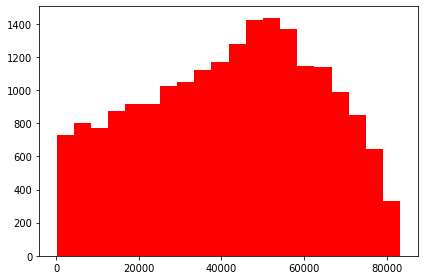

In [50]:
# Histograms for both testPredictions and Y_test

fig, axs = plt.subplots(1, 1, tight_layout=True)

axs.hist(np.asarray(Y_test.Rays), bins = 20, color = 'red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa00c12ae50>]],
      dtype=object)

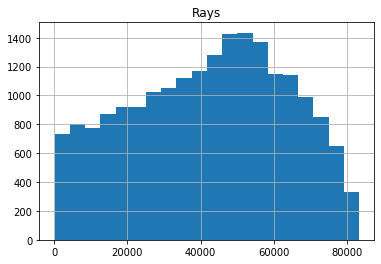

In [51]:
Y_test.hist(bins=20)

In [52]:
comparison = Y_test.copy()

In [59]:
comparison['pred'] = testPredarr.flatten().tolist()

In [60]:
comparison

,Rays,pred
43660,71890,71315.843750
87278,46394,46672.113281
14317,38067,37974.156250
81932,21117,20883.498047
95321,17806,17595.228516
...,...,...
73441,56761,57992.882812
1341,62984,62893.617188
71987,22545,22540.042969
26910,49185,49414.312500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa00c3b7990>,
      dtype=object)

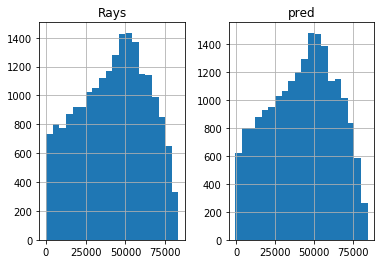

In [61]:
comparison.hist(bins=20)